In [176]:
# !pip install --upgrade plotly
# !pip install sweetviz

In [177]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sw
import warnings

#picture import
from IPython.display import Image, display

from attr import dataclass
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score

warnings.filterwarnings('ignore')

In [178]:
 = pd.read_csv('titanic/train.csv')

In [179]:
.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
data_clean.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [181]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [182]:
print(data_clean.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Removing unnecessary column

In [183]:
data = data.drop('PassengerId', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Ticket', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# To do : add data description (picture that Ronen sent me)

We choose to visualisy the data with SweetVIZ becouse we a limited number of feature

                                             |          | [  0%]   00:00 -> (? left)


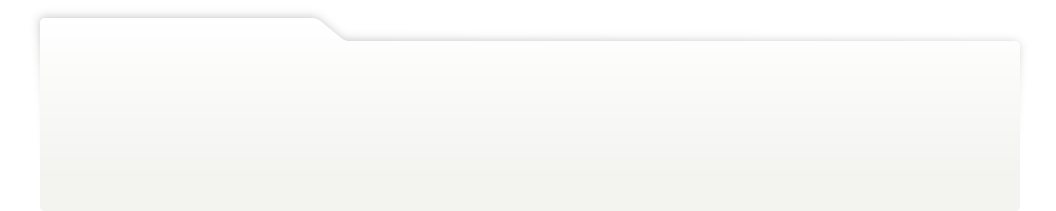
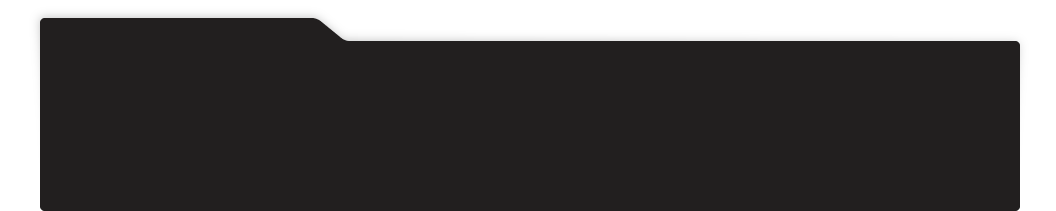
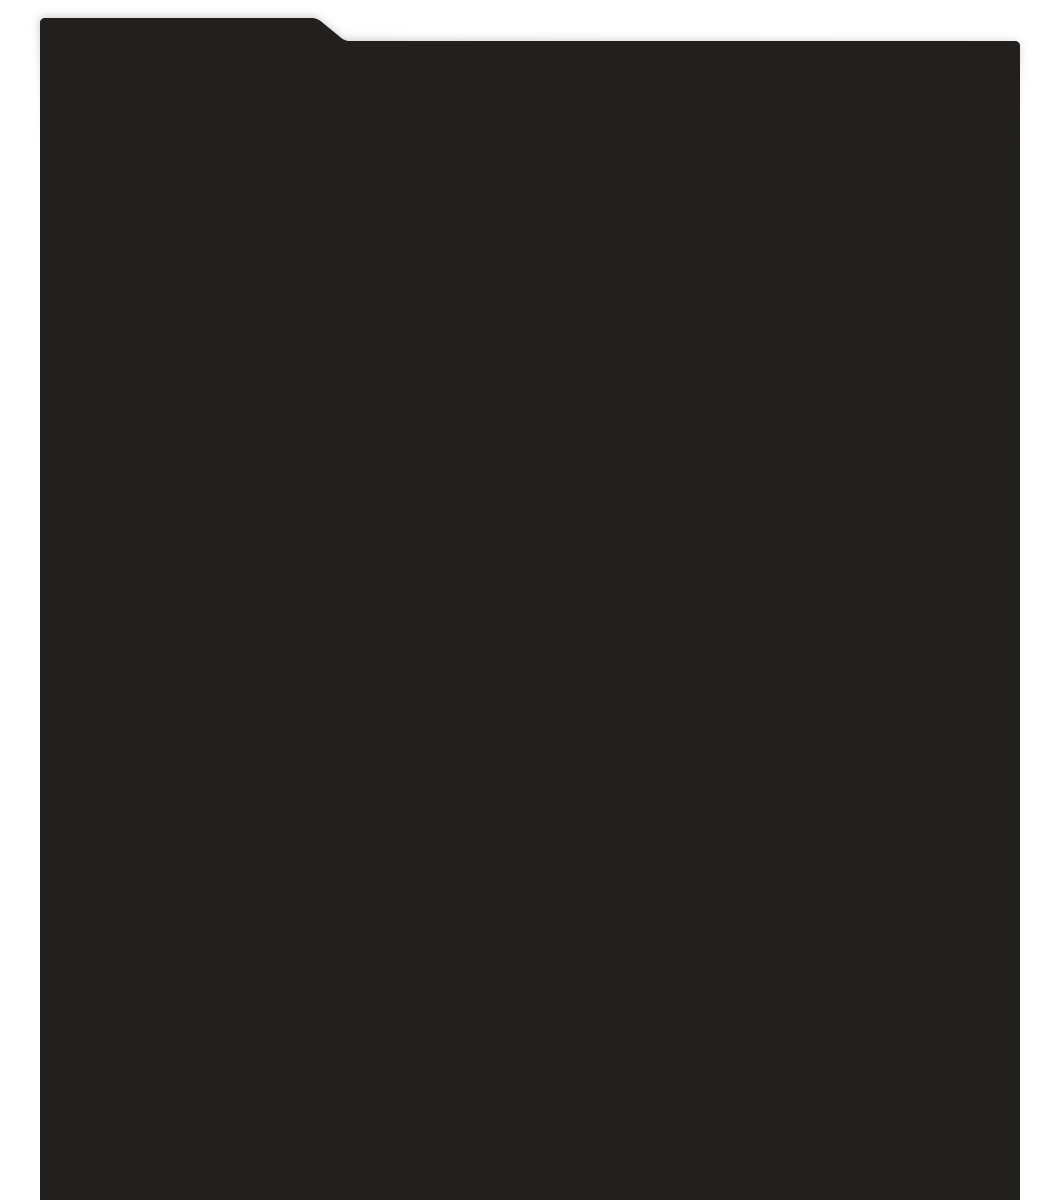
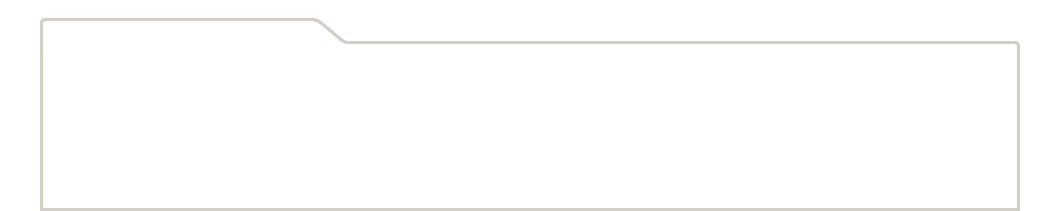
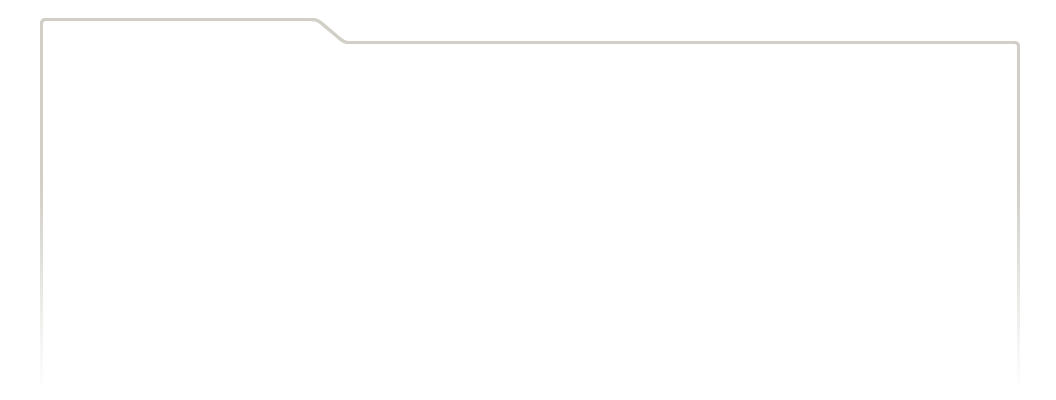
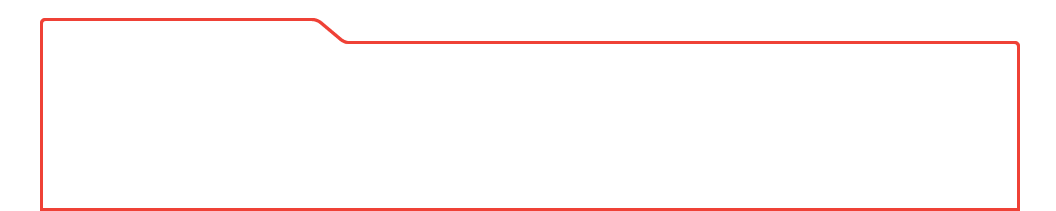
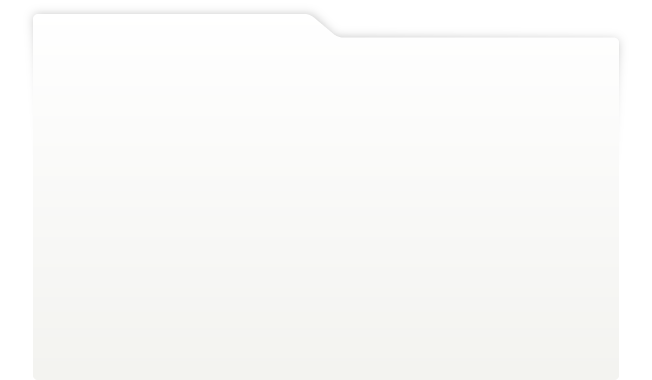
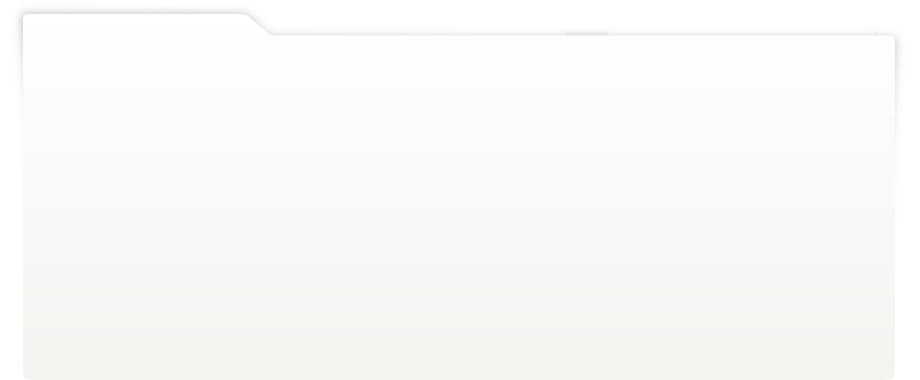
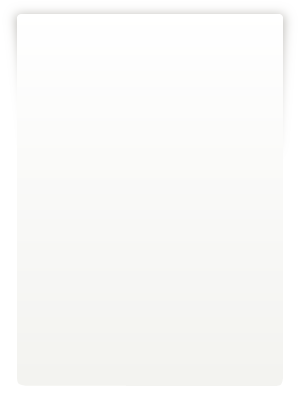
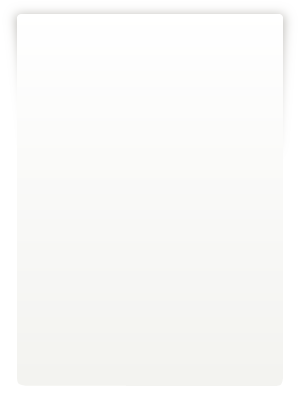
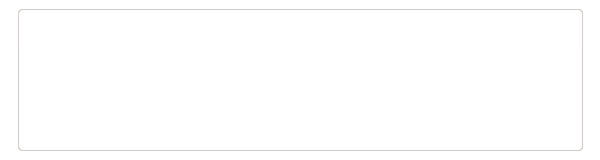
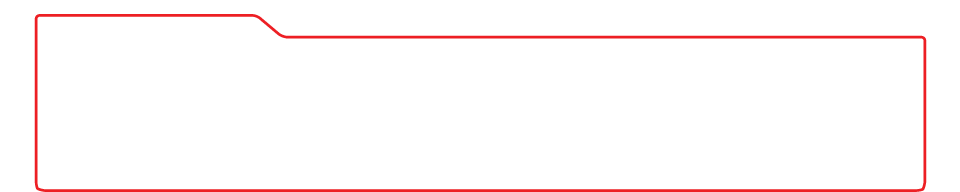
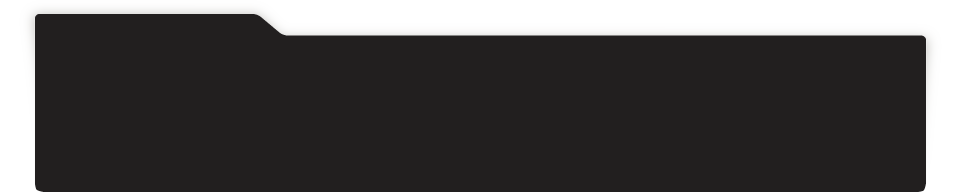
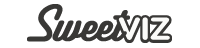
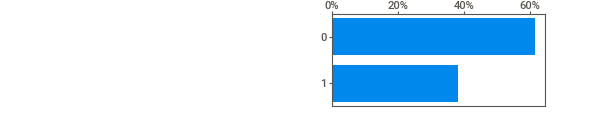
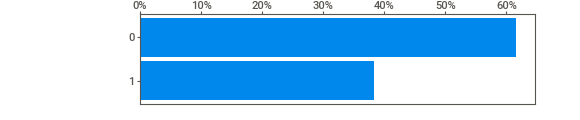
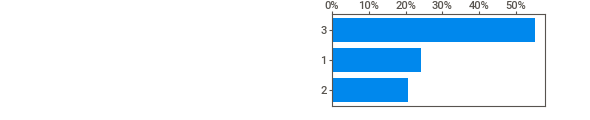
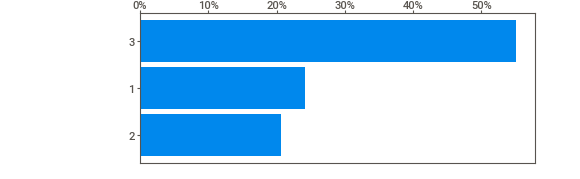
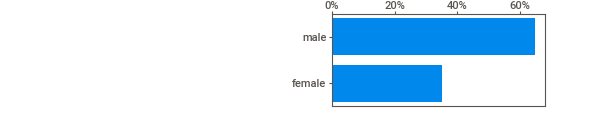
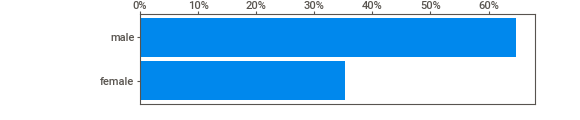
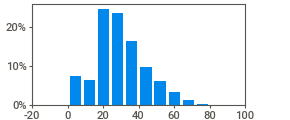
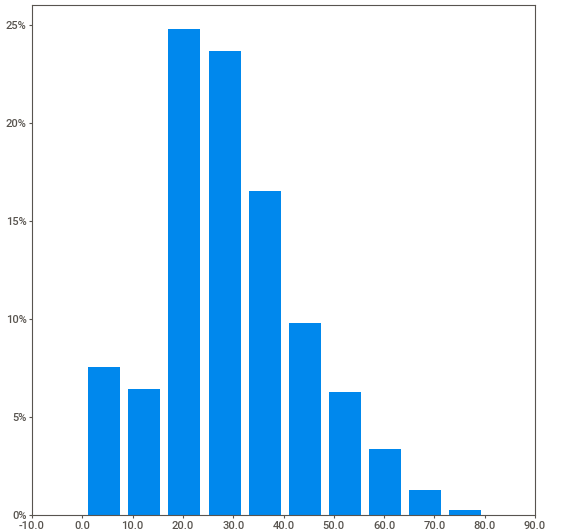
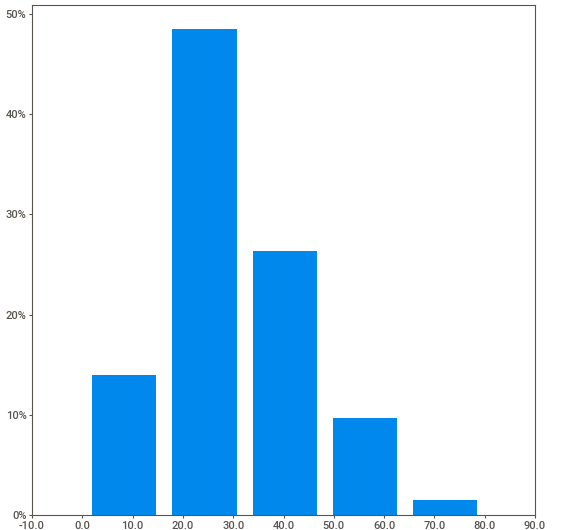
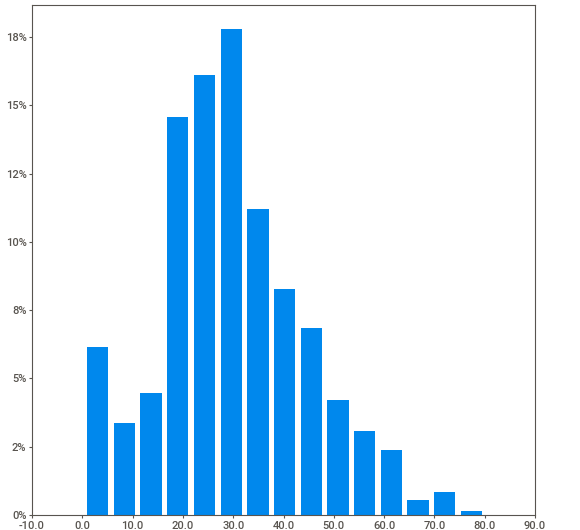
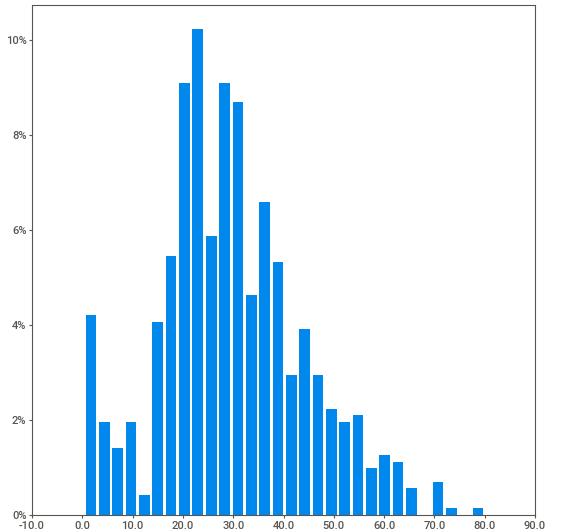
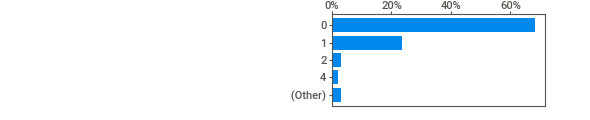
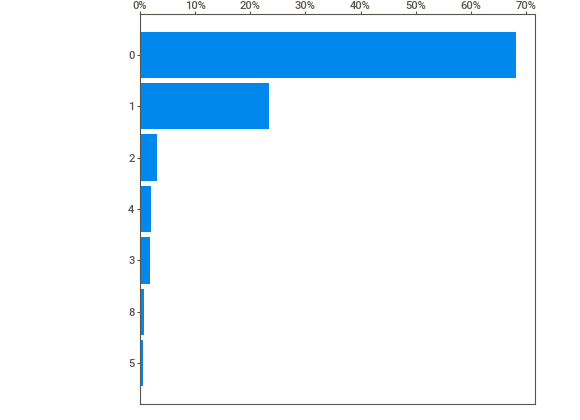
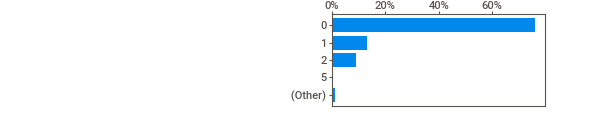
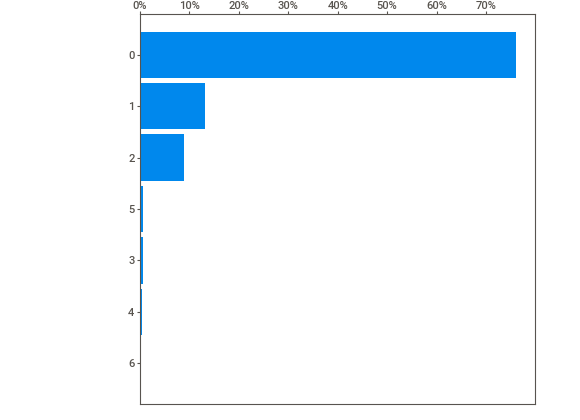
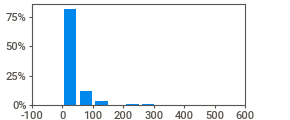
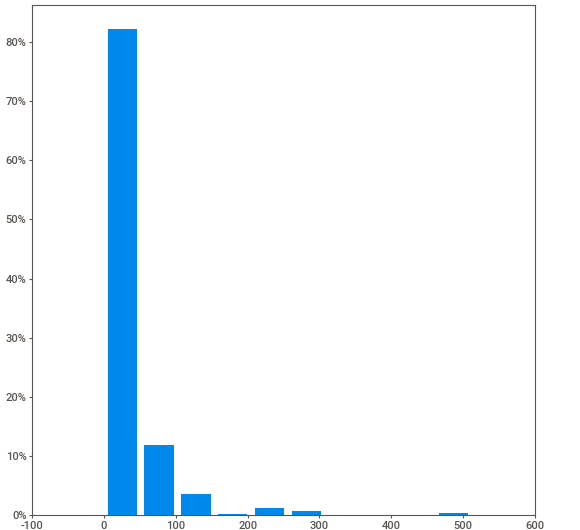
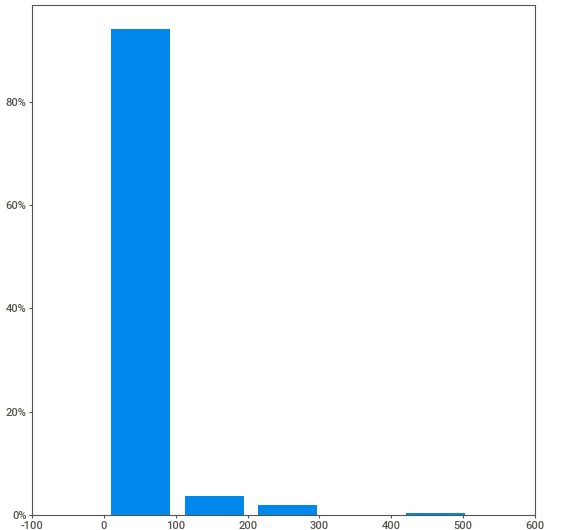
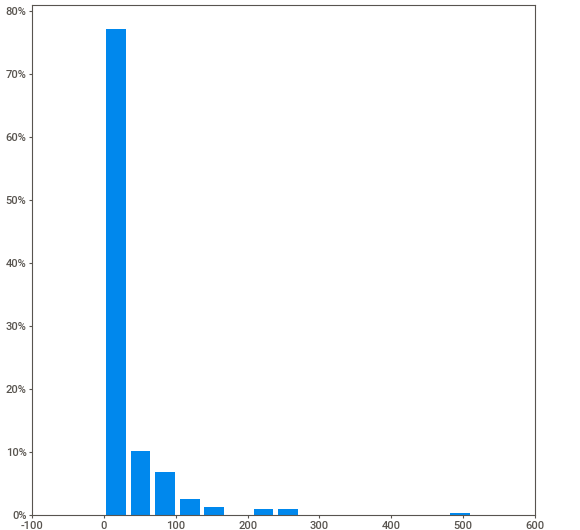
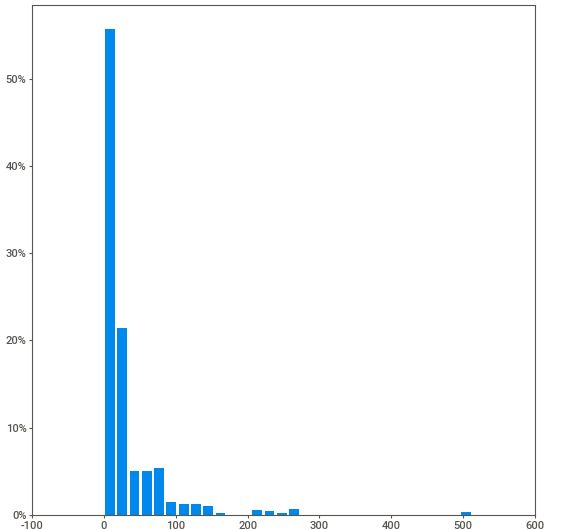
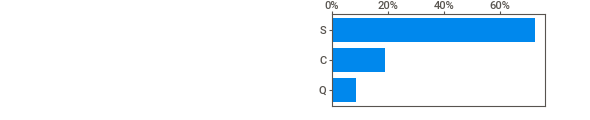
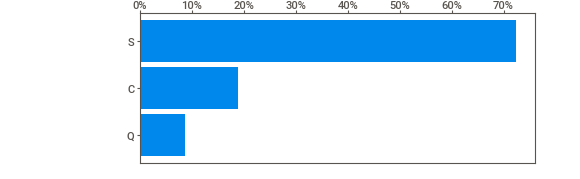
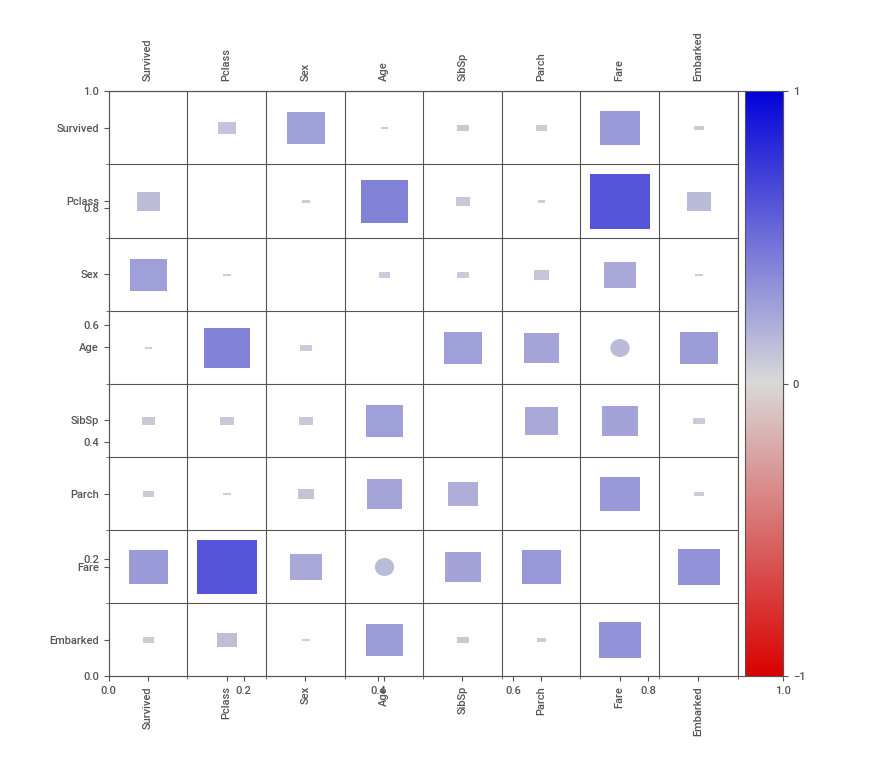
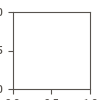

In [184]:
data_report = sw.analyze(data_clean)
data_report.show_notebook(layout='vertical')

# From this visualisation we can see that there is 3 features with missing data
* Age (20% of data missing)
* Cabin (77% of data missing)
* Embarked (2% of data missing)

# Data processing
The Age we can fill with average age from data set
Same we can do with Embarked

But for Cabin number its difficult to just fill so our plan is to create a second data set with no Cabin feature and in the first one transform the column (Cabin feature) to binary option (1 - has Cabin number, 0 - has no Cabin number)


Created a copy of the original data

In [185]:
data_clean_null = data_clean.copy()   # Data set where we ignored the missing values
data_clean = data_clean.copy()        # Data set where we filled the missing values

In [186]:
# Replace missing values with mean
data_clean['Age']=data_clean['Age'].fillna(data_clean['Age'].mean())
data_clean['Embarked']=data_clean['Embarked'].fillna(data_clean['Embarked'].mode()[0])

#The Cabin feature Drop
data_clean.drop(['Cabin'], axis=1, inplace=True)

                                             |          | [  0%]   00:00 -> (? left)


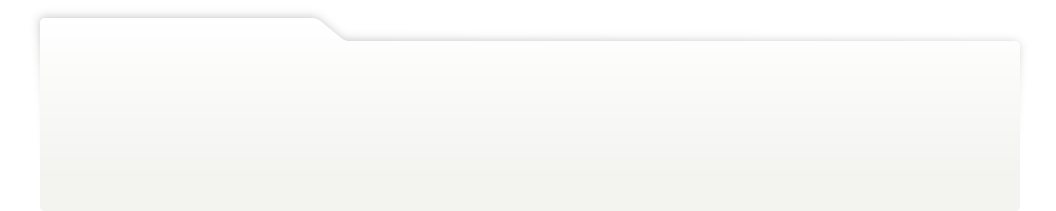
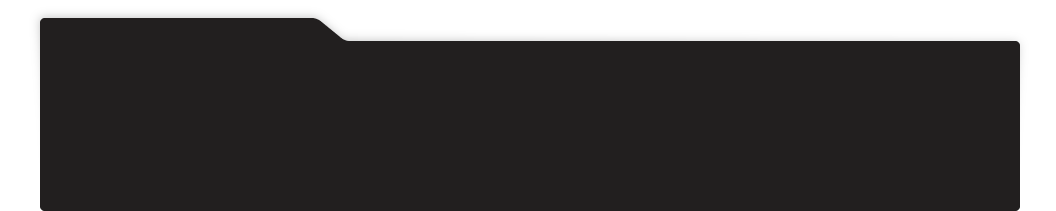
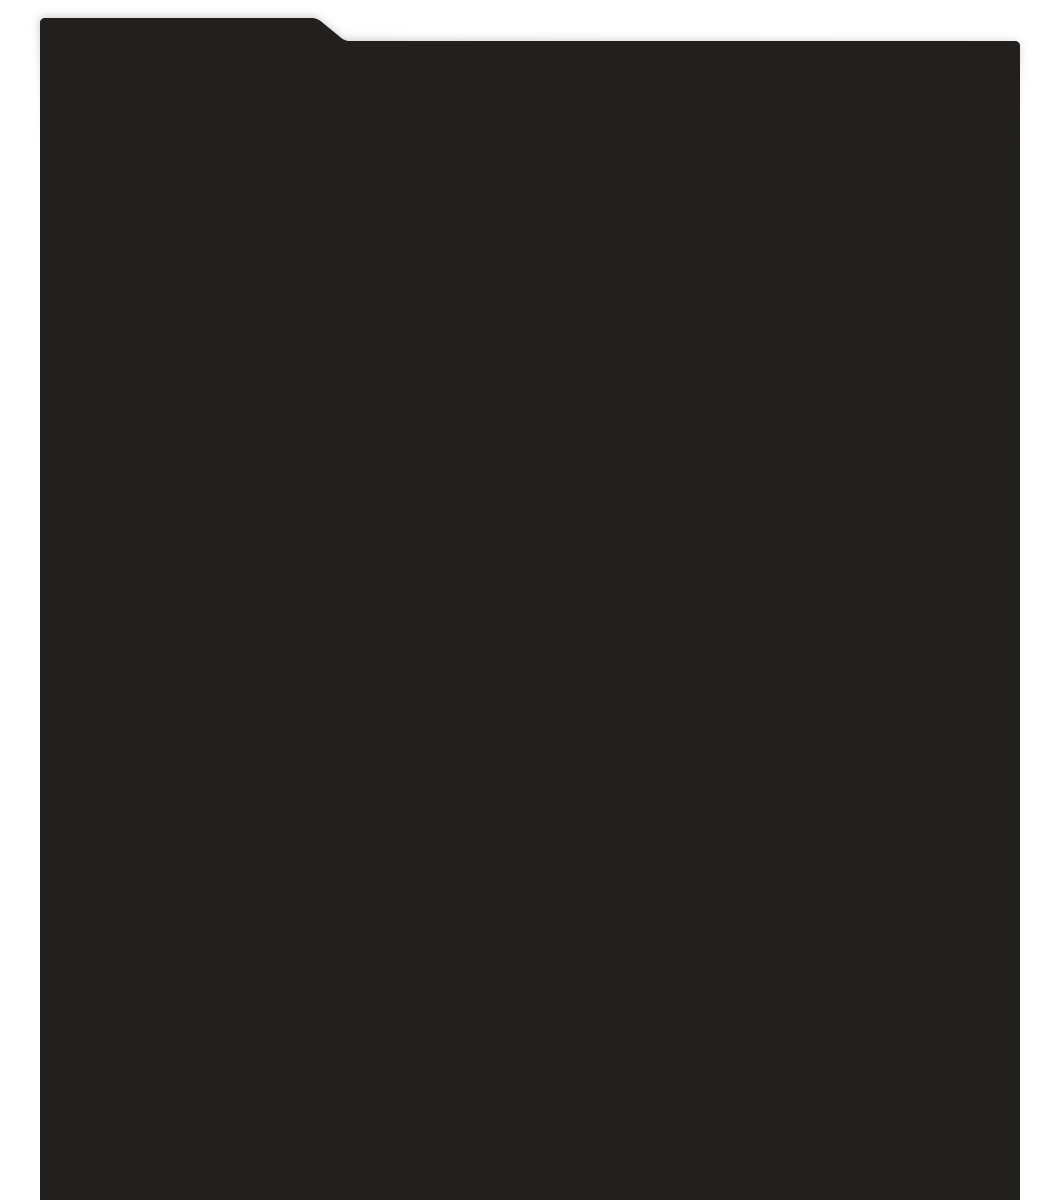
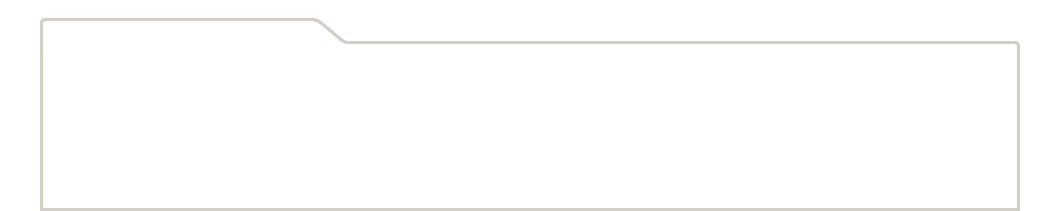
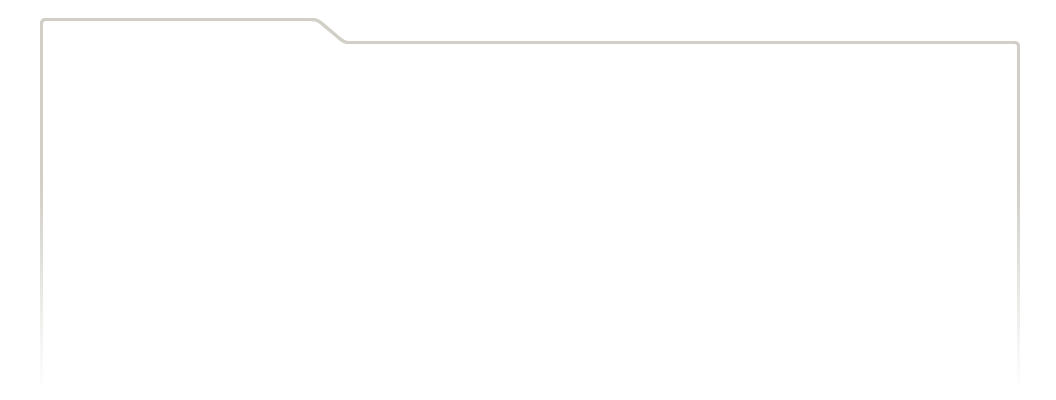
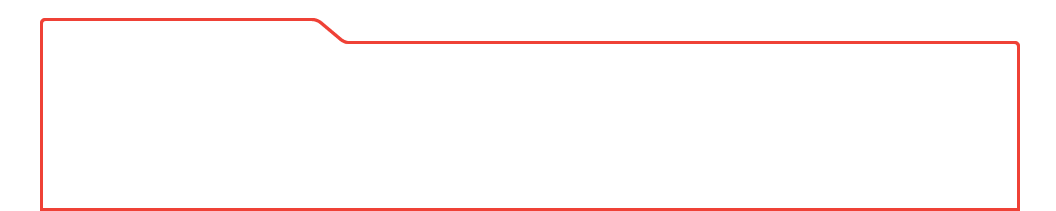
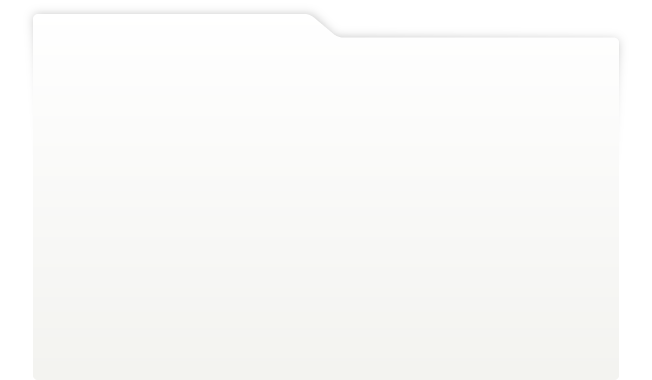
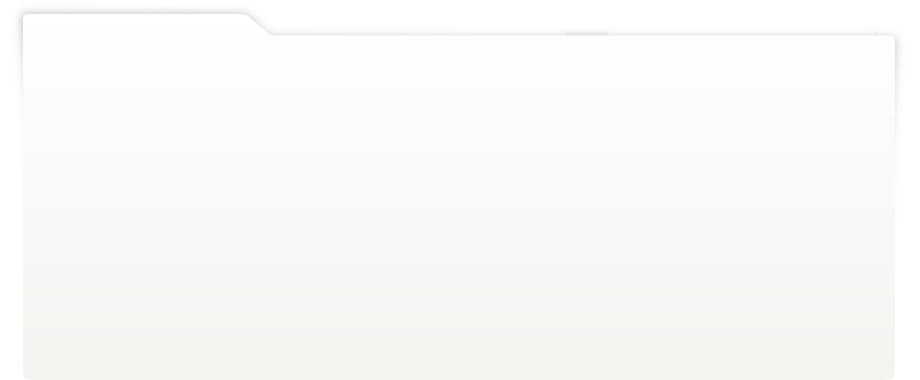
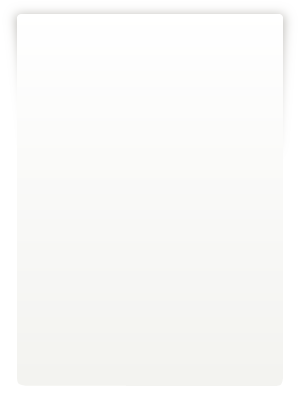
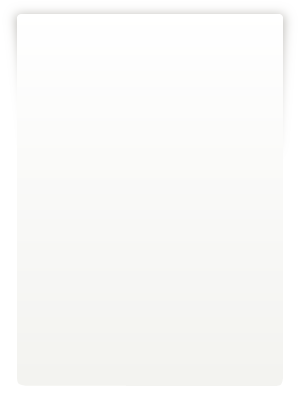
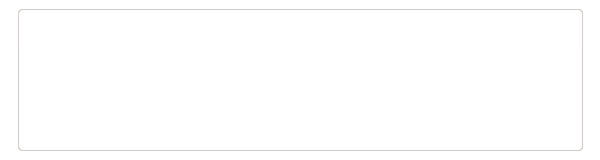
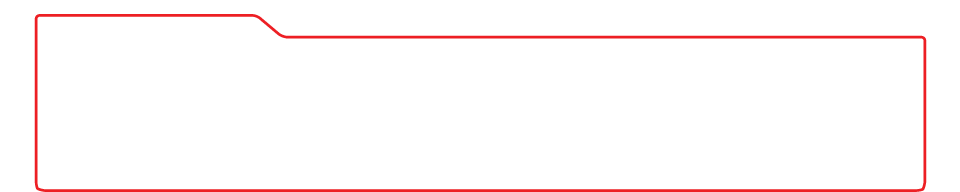
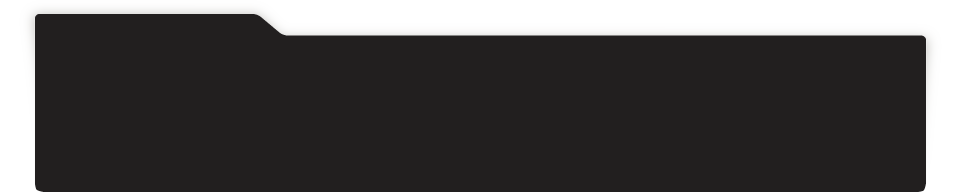
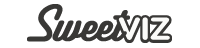
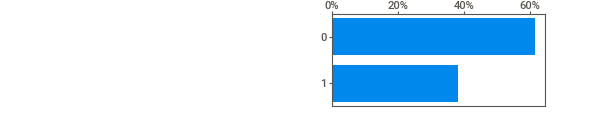
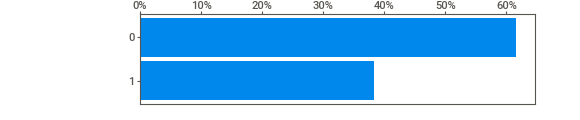
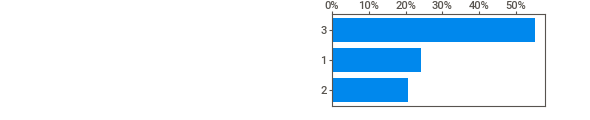
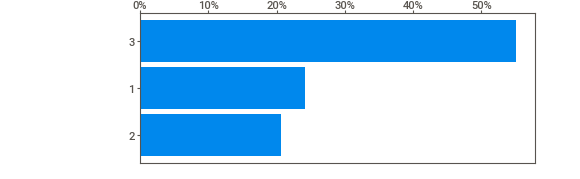
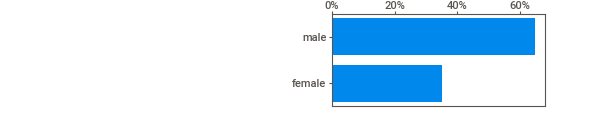
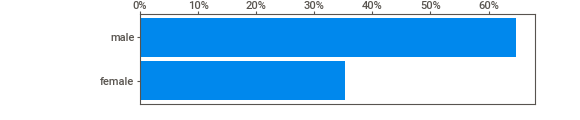
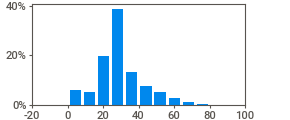
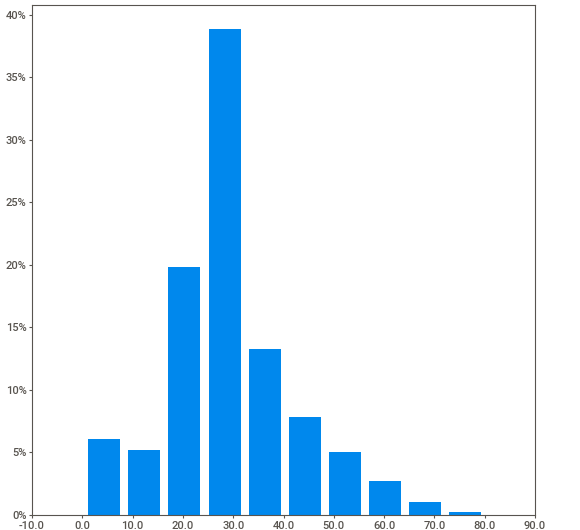
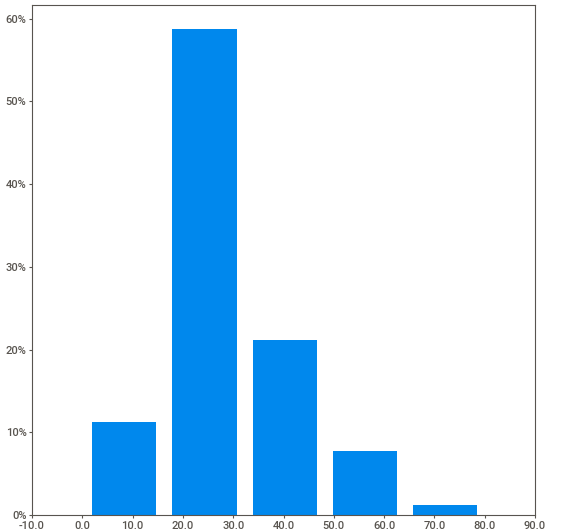
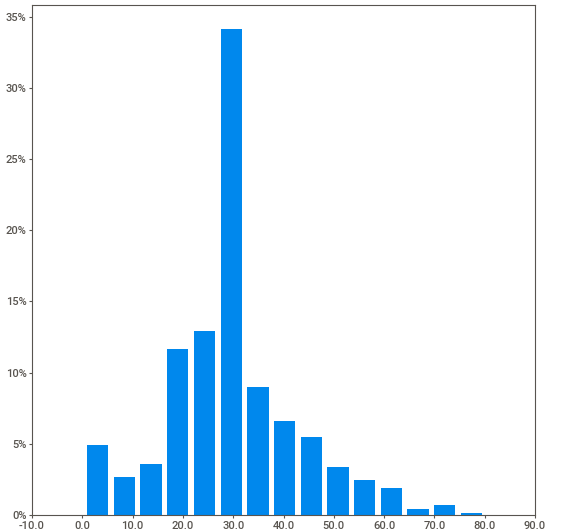
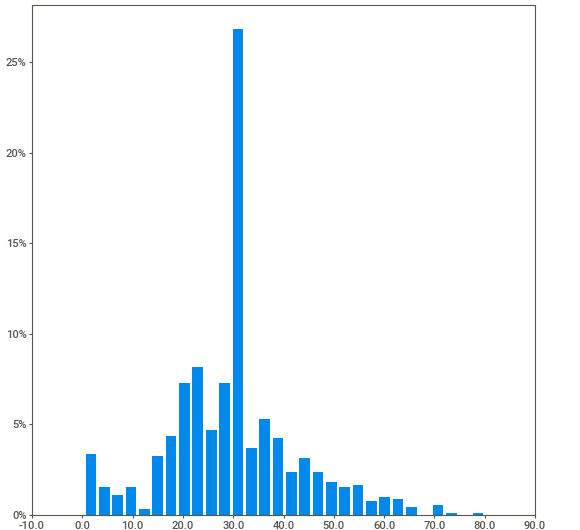
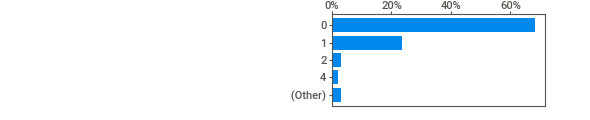
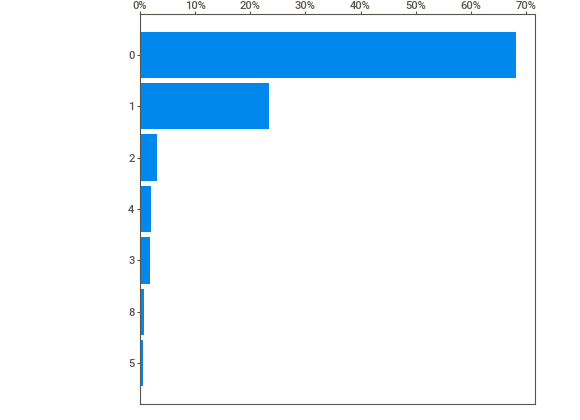
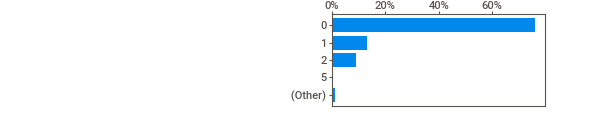
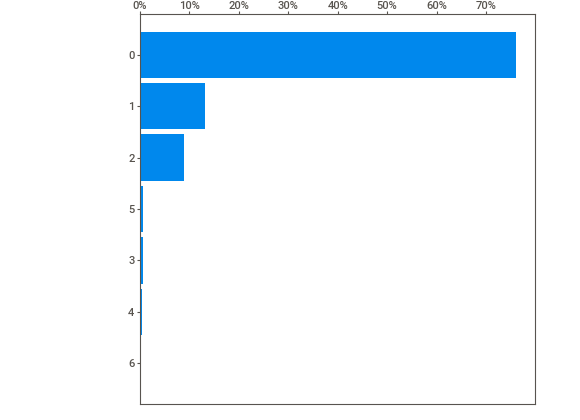
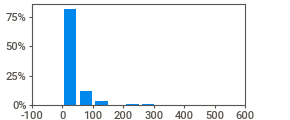
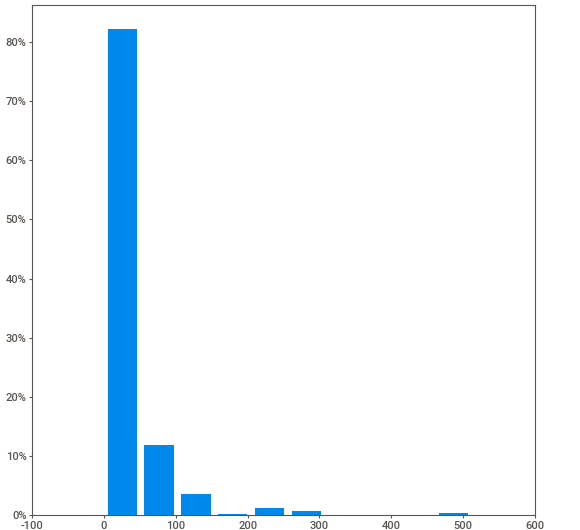
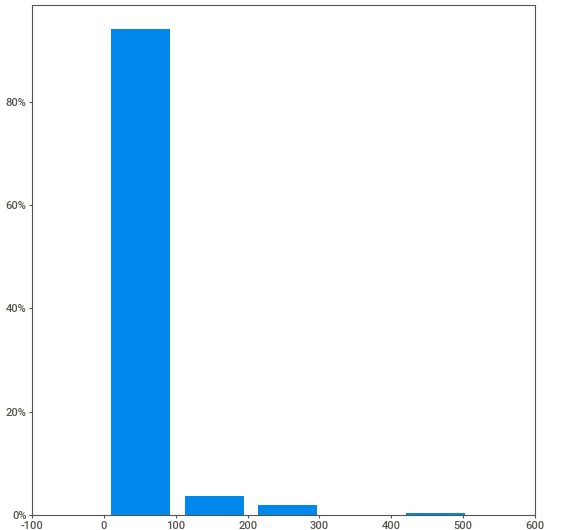
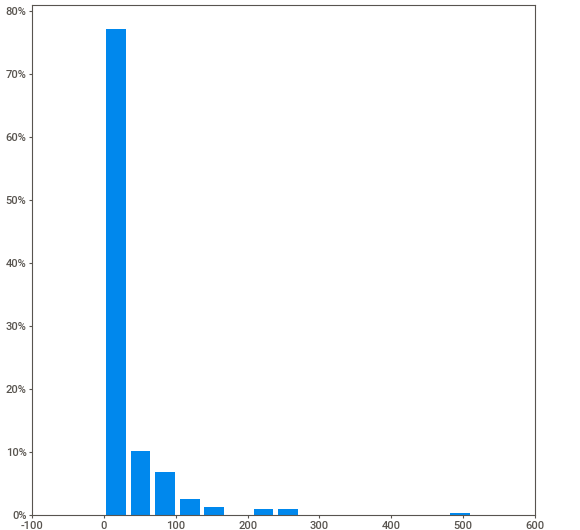
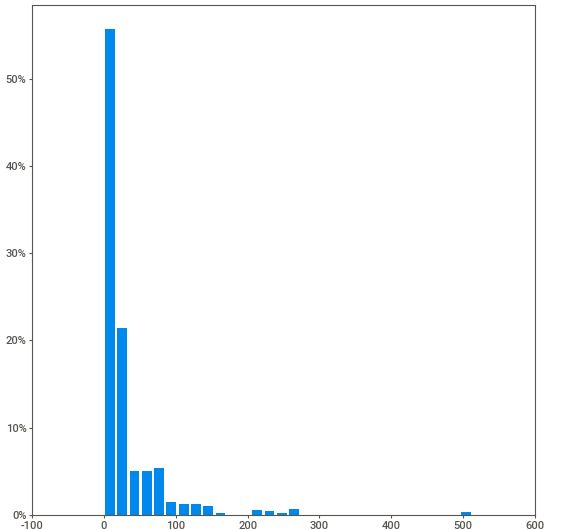
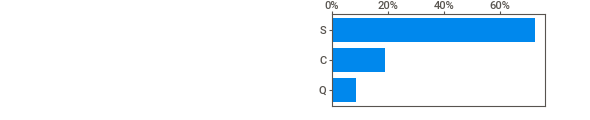
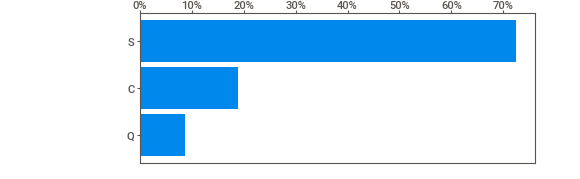
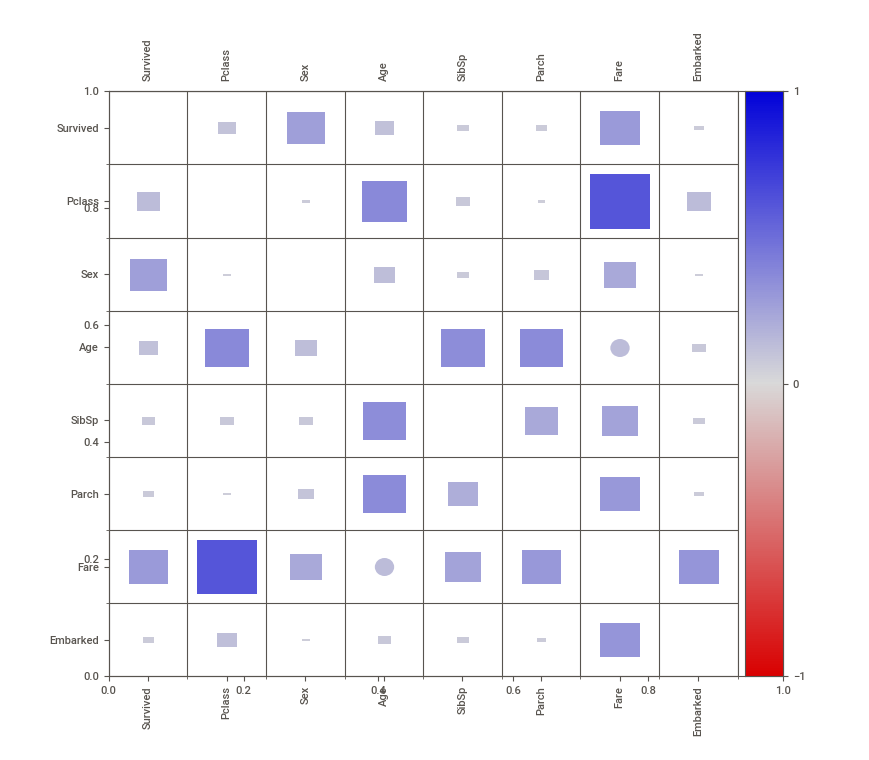
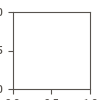

In [187]:
data_report_new = sw.analyze(data_clean)
data_report_new.show_notebook(layout='vertical')

In [188]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Now we want to replace the categorical columns with numerical values

In [192]:
def encode_data(df, columns, method):
    """
    Encode specified columns of a dataframe using different encoding methods.

    Parameters:
    df (pd.DataFrame): Input dataframe.
    columns (list): List of columns to encode.
    method (str): Encoding method to use - 'dummy', 'onehot'.

    Returns:
    pd.DataFrame: A dataframe with the encoded columns.
    """
    encoded_df = df.copy()

    if method == 'dummy':
        # Using pandas get_dummies for dummy encoding
        encoded_df = pd.get_dummies(encoded_df, columns=columns, drop_first=True)

    elif method == 'onehot':
        from sklearn.preprocessing import OneHotEncoder
        onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        for col in columns:
            encoded_array = onehot_encoder.fit_transform(encoded_df[[col]])
            encoded_df = pd.concat(
                [
                    encoded_df.drop(col, axis=1),
                    pd.DataFrame(encoded_array, columns=[f"{col}_{cat}" for cat in onehot_encoder.categories_[0]])
                ],
                axis=1
            )
    else:
        raise ValueError("Invalid method. Choose from 'dummy', 'onehot'.")

    return encoded_df

In [193]:
# Encode columns using dummy encoding
dummy_encoded_df = encode_data(data_clean, columns=['Sex', 'Embarked'], method='dummy')

# Encode columns using one-hot encoding
onehot_encoded_df = encode_data(data_clean, columns=['Sex', 'Embarked'], method='onehot')

# Print the result to check
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

print("\nOriginal DataFrame:")
print(data_clean.head())

print("\nDummy Encoded DataFrame:")
print(dummy_encoded_df.head())

print("\nOne-Hot Encoded DataFrame:")
print(onehot_encoded_df.head())


Original DataFrame:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

Dummy Encoded DataFrame:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         0       3  22.0      1      0   7.2500      True       False        True
1         1       1  38.0      1      0  71.2833     False       False       False
2         1       3  26.0      0      0   7.9250     False       False        True
3         1       1  35.0      1      0  53.1000     False       False        True
4         0       3  35.0      0      0   8.0500      True       False        True

One-Hot Encoded DataFrame:
   Survived  Pclass   Age  SibS

In [194]:
# Create target variable 't' and features 'X' for the original and encoded DataFrames
t_original = data_clean['Survived'].copy()
X_original = data_clean.drop("Survived", axis=1)

# Encode columns using dummy encoding
t_dummy = dummy_encoded_df['Survived'].copy()
X_dummy = dummy_encoded_df.drop("Survived", axis=1)

# Encode columns using one-hot encoding
t_onehot = onehot_encoded_df['Survived'].copy()
X_onehot = onehot_encoded_df.drop("Survived", axis=1)

# Display results for all cases
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Original DataFrame
print("\nOriginal DataFrame - Target (t) and Features (X):")
display(t_original.head())
display(X_original.head())

# Dummy Encoded DataFrame
print("\nDummy Encoded DataFrame - Target (t) and Features (X):")
display(t_dummy.head())
display(X_dummy.head())

# One-Hot Encoded DataFrame
print("\nOne-Hot Encoded DataFrame - Target (t) and Features (X):")
display(t_onehot.head())
display(X_onehot.head())


Original DataFrame - Target (t) and Features (X):


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S



Dummy Encoded DataFrame - Target (t) and Features (X):


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True



One-Hot Encoded DataFrame - Target (t) and Features (X):


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [195]:
from sklearn.model_selection import train_test_split

# Split the original data
X_train_original, X_val_original, t_train_original, t_val_original = train_test_split(
    X_original, t_original, test_size=0.3, random_state=1
)

# Split the dummy encoded data
X_train_dummy, X_val_dummy, t_train_dummy, t_val_dummy = train_test_split(
    X_dummy, t_dummy, test_size=0.3, random_state=1
)

# Split the one-hot encoded data
X_train_onehot, X_val_onehot, t_train_onehot, t_val_onehot = train_test_split(
    X_onehot, t_onehot, test_size=0.3, random_state=1
)

Dummy Encoding Accuracy: 77.61%
OneHot Encoding Accuracy: 77.61%


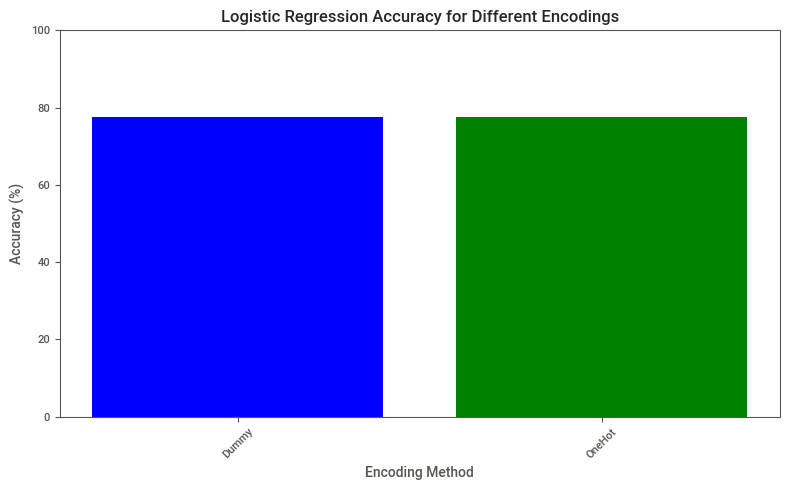

In [196]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def evaluate_logistic_regression(X_train_dict, X_val_dict, t_train_dict, t_val_dict):
    """
    Evaluates logistic regression on different encoded datasets and plots the accuracies.

    Parameters:
    X_train_dict (dict): Dictionary containing training feature sets for each encoding method.
    X_val_dict (dict): Dictionary containing validation feature sets for each encoding method.
    t_train_dict (dict): Dictionary containing training targets for each encoding method.
    t_val_dict (dict): Dictionary containing validation targets for each encoding method.

    Returns:
    None
    """
    accuracies = {}

    for method in X_train_dict.keys():
        # Initialize Logistic Regression
        logreg = LogisticRegression(max_iter=1000, random_state=1)

        # Train the model
        logreg.fit(X_train_dict[method], t_train_dict[method])

        # Predict on the validation set
        t_pred = logreg.predict(X_val_dict[method])

        # Calculate accuracy
        acc = round(accuracy_score(t_val_dict[method], t_pred) * 100, 2)
        accuracies[method] = acc

    for method, accuracy in accuracies.items():
        print(f"{method} Encoding Accuracy: {accuracy}%")

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
    plt.title("Logistic Regression Accuracy for Different Encodings")
    plt.xlabel("Encoding Method")
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Prepare dictionaries for training and validation sets for each method
X_train_dict = {
    'Dummy': X_train_dummy,
    'OneHot': X_train_onehot,
}

X_val_dict = {
    'Dummy': X_val_dummy,
    'OneHot': X_val_onehot,
}

t_train_dict = {
    'Dummy': t_train_dummy,
    'OneHot': t_train_onehot,
}

t_val_dict = {
    'Dummy': t_val_dummy,
    'OneHot': t_val_onehot,
}

# Evaluate and visualize results
evaluate_logistic_regression(X_train_dict, X_val_dict, t_train_dict, t_val_dict)

*Feature engineering

OneHot Encoding Logistic Regression Metrics:
Accuracy: 0.78
Precision: 0.77
Recall: 0.68
F1 Score: 0.72

Confusion Matrix (Raw):
[[130  23]
 [ 37  78]]

Confusion Matrix (Normalized):
[[0.8496732  0.1503268 ]
 [0.32173913 0.67826087]]


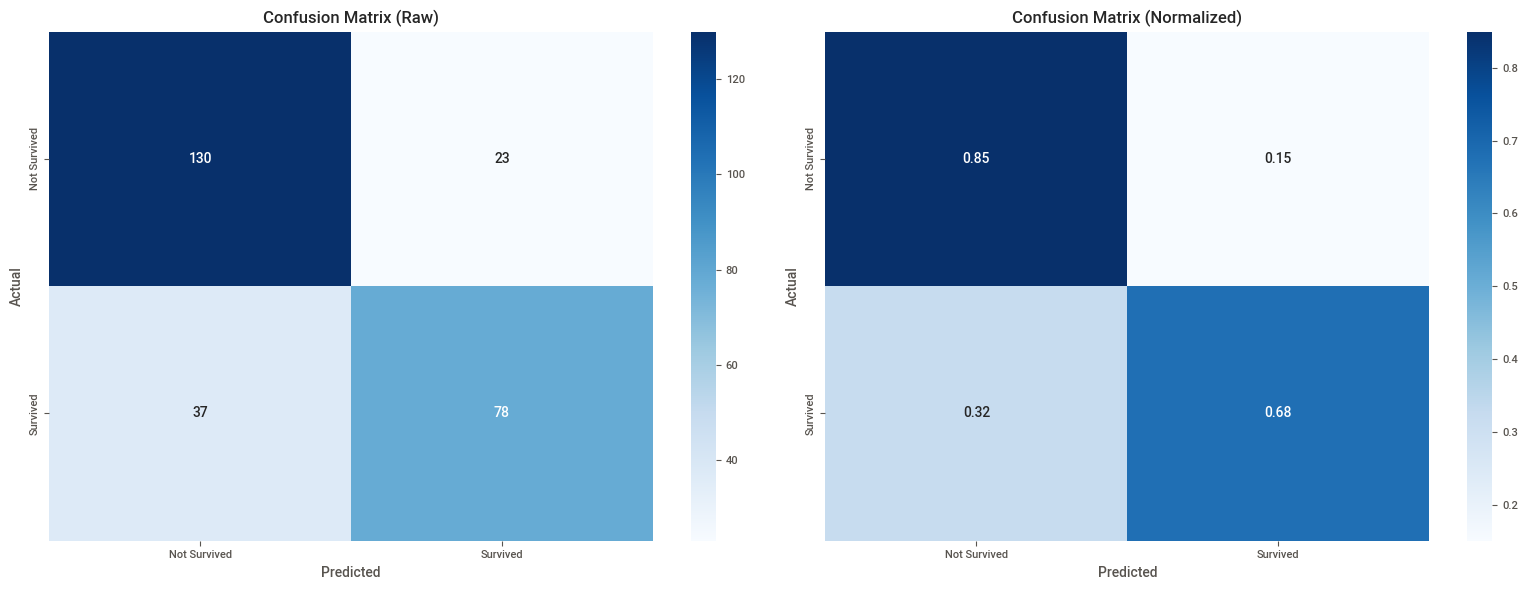

In [203]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=1)

# Train the model using OneHot encoded data
logreg.fit(X_train_onehot, t_train_onehot)

# Predict on the validation set
t_pred_onehot = logreg.predict(X_val_onehot)

# Calculate various metrics
accuracy = accuracy_score(t_val_onehot, t_pred_onehot)
precision = precision_score(t_val_onehot, t_pred_onehot)
recall = recall_score(t_val_onehot, t_pred_onehot)
f1 = f1_score(t_val_onehot, t_pred_onehot)
conf_matrix = confusion_matrix(t_val_onehot, t_pred_onehot)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print the results
print("Results of the Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the confusion matrix
print("\nConfusion Matrix (Raw):")
print(conf_matrix)

print("\nConfusion Matrix (Normalized):")
print(conf_matrix_normalized)

# Visualize the confusion matrices
plt.figure(figsize=(16, 6))

# Raw Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix (Raw)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In the matrix we can see that we got 32%  chance for type 2 error and 15% chance for type 1 error

Results of the Logistic Regression with RFECV and Elastic Net Regularization:
Number of Features Selected: 6
Accuracy: 0.76
Precision: 0.77
Recall: 0.63
F1 Score: 0.69

Confusion Matrix (Raw):
[[132  21]
 [ 43  72]]

Confusion Matrix (Normalized):
[[0.8627451  0.1372549 ]
 [0.37391304 0.62608696]]


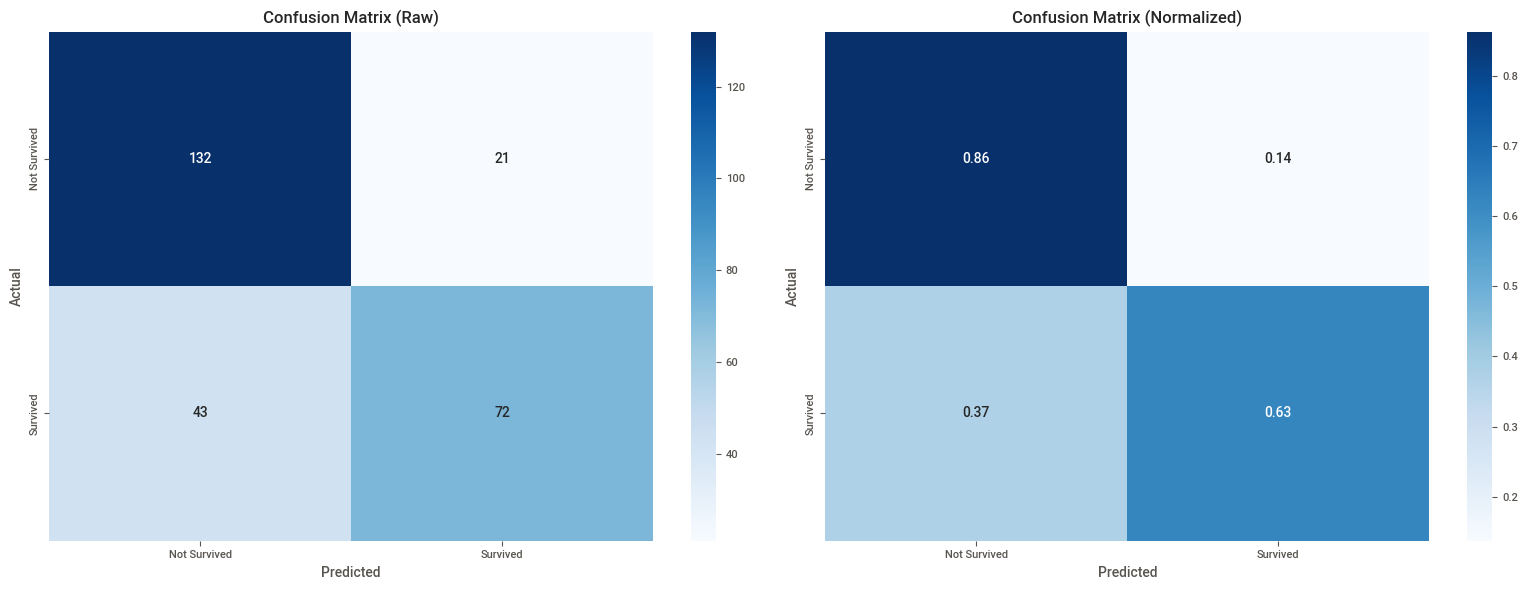

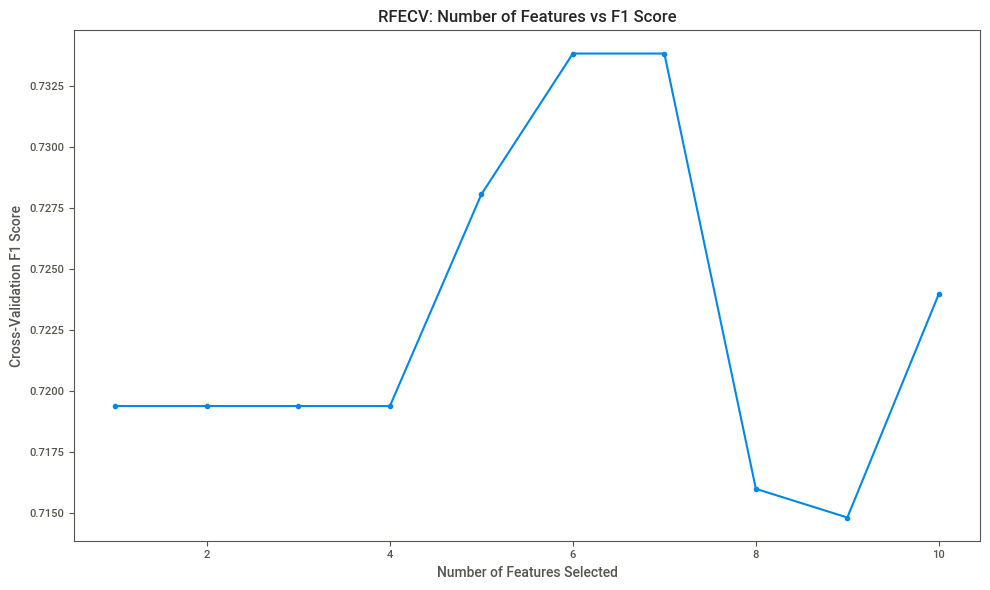

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression with Elastic Net regularization
logreg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000,C=1.0, random_state=1, l1_ratio=0.5)

# Perform RFECV for feature selection
rfecv = RFECV(
    estimator=logreg_elastic,
    step=1,
    cv=StratifiedKFold(5),  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1  # Use all available processors
)

# Fit RFECV on the training data (OneHot encoded)
rfecv.fit(X_train_onehot, t_train_onehot)

# Transform the datasets to use only the selected features
X_train_selected = rfecv.transform(X_train_onehot)
X_val_selected = rfecv.transform(X_val_onehot)

# Train the logistic regression model on the selected features
logreg_elastic.fit(X_train_selected, t_train_onehot)

# Predict on the validation set
t_pred_selected = logreg_elastic.predict(X_val_selected)

# Calculate various metrics
accuracy = accuracy_score(t_val_onehot, t_pred_selected)
precision = precision_score(t_val_onehot, t_pred_selected)
recall = recall_score(t_val_onehot, t_pred_selected)
f1 = f1_score(t_val_onehot, t_pred_selected)
conf_matrix = confusion_matrix(t_val_onehot, t_pred_selected)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print the results
print("Results of the Logistic Regression with RFECV and Elastic Net Regularization:")
print(f"Number of Features Selected: {rfecv.n_features_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the confusion matrix
print("\nConfusion Matrix (Raw):")
print(conf_matrix)

print("\nConfusion Matrix (Normalized):")
print(conf_matrix_normalized)

# Visualize the confusion matrices
plt.figure(figsize=(16, 6))

# Raw Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix (Raw)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Visualize the RFECV feature selection process
plt.figure(figsize=(10, 6))
plt.title("RFECV: Number of Features vs F1 Score")
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation F1 Score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.tight_layout()
plt.show()

Best Parameters: {'C': 1, 'l1_ratio': 0.1}
Results of the Logistic Regression with RFECV and Elastic Net Regularization:
Number of Features Selected: 6
Accuracy: 0.76
Precision: 0.77
Recall: 0.63
F1 Score: 0.69

Confusion Matrix (Raw):
[[132  21]
 [ 43  72]]

Confusion Matrix (Normalized):
[[0.8627451  0.1372549 ]
 [0.37391304 0.62608696]]


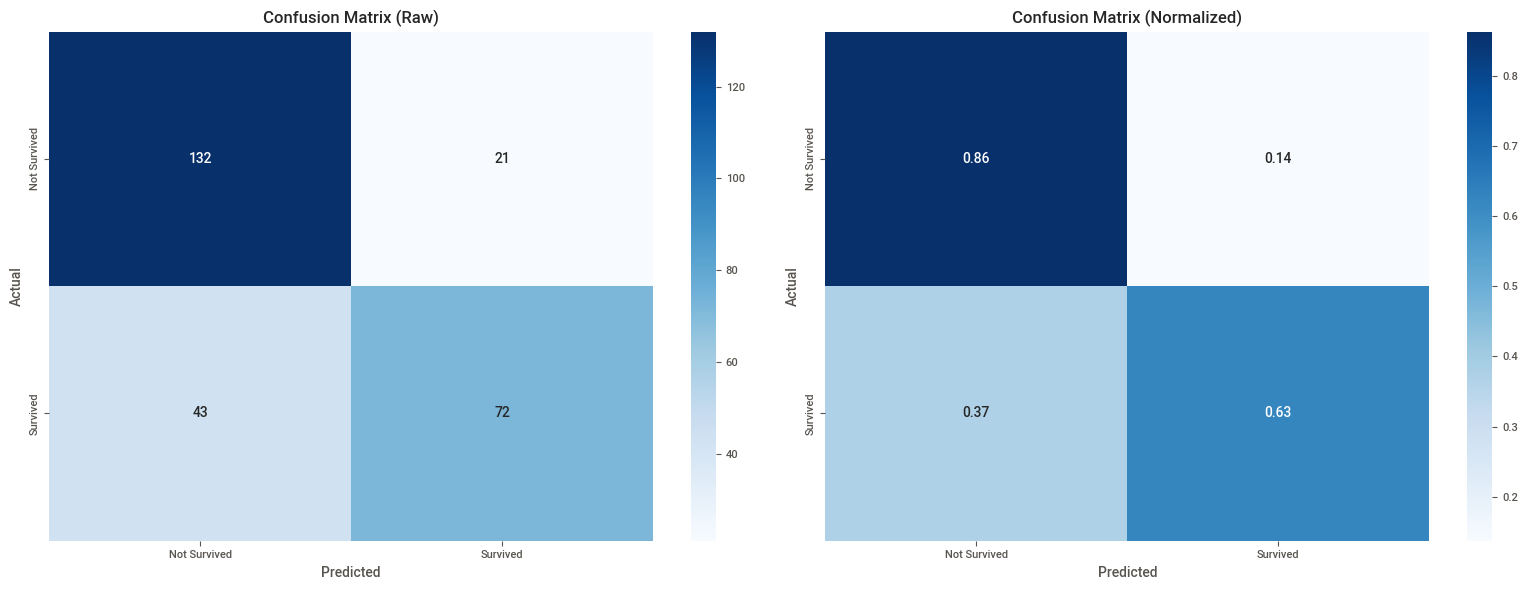

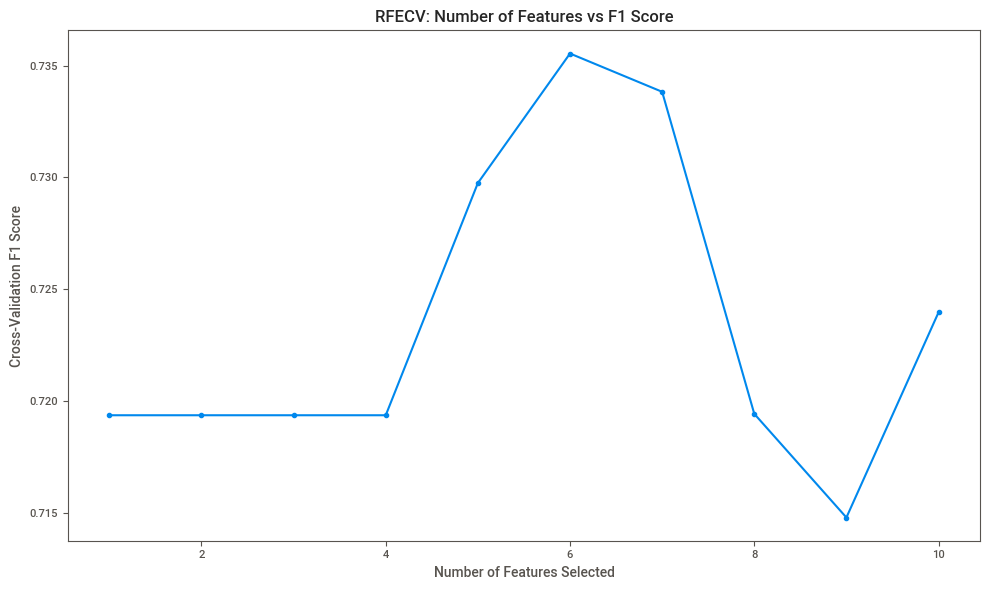

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Define the logistic regression model
logreg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # L1/L2 balance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_elastic,
    param_grid=param_grid,
    scoring='f1',
    cv=StratifiedKFold(5),  # 5-fold cross-validation
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV on the training data (OneHot encoded)
grid_search.fit(X_train_onehot, t_train_onehot)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Perform RFECV for feature selection with the best model
rfecv = RFECV(
    estimator=best_logreg,
    step=1,
    cv=StratifiedKFold(5),  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1
)

# Fit RFECV on the training data
rfecv.fit(X_train_onehot, t_train_onehot)

# Transform the datasets to use only the selected features
X_train_selected = rfecv.transform(X_train_onehot)
X_val_selected = rfecv.transform(X_val_onehot)

# Train the logistic regression model on the selected features
best_logreg.fit(X_train_selected, t_train_onehot)

# Predict on the validation set
t_pred_selected = best_logreg.predict(X_val_selected)

# Calculate various metrics
accuracy = accuracy_score(t_val_onehot, t_pred_selected)
precision = precision_score(t_val_onehot, t_pred_selected)
recall = recall_score(t_val_onehot, t_pred_selected)
f1 = f1_score(t_val_onehot, t_pred_selected)
conf_matrix = confusion_matrix(t_val_onehot, t_pred_selected)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print the results
print("Results of the Logistic Regression with RFECV and Elastic Net Regularization:")
print(f"Number of Features Selected: {rfecv.n_features_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the confusion matrix
print("\nConfusion Matrix (Raw):")
print(conf_matrix)

print("\nConfusion Matrix (Normalized):")
print(conf_matrix_normalized)

# Visualize the confusion matrices
plt.figure(figsize=(16, 6))

# Raw Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix (Raw)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Visualize the RFECV feature selection process
plt.figure(figsize=(10, 6))
plt.title("RFECV: Number of Features vs F1 Score")
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation F1 Score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.tight_layout()
plt.show()